# Brunch Data Analysis

**Brunch** is one of the biggest blog platforms in South Korea. This study will investigate what factors made writers more famous and influential. 

- It is based on the data collected on 24 August 2017

In [1]:
import pandas as pd
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from data_management import read_related_data, get_list_df_by_writers, get_article_df_by_writers, \
                            get_follower_df_by_writers, get_following_df_by_writers, parse_datetime

In [3]:
df = read_related_data()

## The writers who have 5000+ followers

- The number of writers who are followed by over 5000 members is 162
- The average of the number of followers is 7589
- The average of writer count and article count are 150, 166, but the standard deviation is 767, 224
- The writer who has the least articles wrote only 8 to get over 5000 followers
- The impact of article count on follower count is not relevant 

In [4]:
top_df = df[df["follower_count"] > 5000].sort_values("follower_count", ascending=False).iloc[1:,]
top_df["username"].values

array(['바닐라로맨스', '책방아저씨', 'Alice in wonderland', '왕고래', '페리테일', '달다',
       '윤직원', '티거 Jang', 'one', '두근거림', '좋은비', '한재우', '금요일 흐림',
       '안정현 심리학자 마음달', 'Sustain Life', '신동진', 'rae', 'Sean Pyo',
       '에디터C 최혜진', '손화신', '조우성 변호사', '차칸양', '깐 KKan', '캡틴K', '강선생',
       '글쟁이 짱쓸', '클링키', 'ALICE', '글쓰는 사진작가 혜류', '안바다', '마음을그리는화가',
       '오두막바리스타', '필로 이경희', '에리얼의 영화수납장', '감성호랑이', '질문술사', '위키트리 WIKITREE',
       '김권수', 'Peter', '꾸빠', '론리플래닛 매거진 코리아', '흔디', '리모', '신상철', '엄지사진관',
       '이시스', '고수리', '김동진', '빛샘', 'puding', '단어벌레', 'AMARANTH', '청민', '양보',
       '플래텀', '김태훈', 'YoungJun Jamie Jo', '보름', '김태희', '김은덕 백종민',
       'Sarah Kim', '이요셉', 'Storytraveller', '저녁', '허용회', 'yoonash',
       '이기주작가', '유환희', '권귀헌 Homo Askus', '그림 읽어주는 엄마', '나는 누군가',
       '폰토그래퍼 김두혁', '호송송 시네마', '빨간우산', '그럼에도 불구하고', '정욱', '한국현', '달공원',
       '이동진', '퍼펙트 프리젠테이션 작가 김재성', '남성태', 'Mobiinside', '스카이스캐너', '이혜원',
       'ExpediaKR', '이동혁 건축가', 'UX 컨설턴트 전민수', '김진만', '김도현 뉴미디어 영어', '탐구토끼',
       'EastRain', 

In [5]:
top_df.describe()

,count,follower_count,writer_count,article_count
count,162.000000,162.00000,162.000000,162.000000
mean,456.475309,7589.04321,149.654321,165.944444
std,411.724192,2527.17562,767.096521,223.593277
min,71.000000,5010.00000,0.000000,8.000000
25%,297.250000,5752.00000,8.000000,55.250000
50%,404.500000,6818.00000,25.000000,113.500000
75%,525.000000,8573.25000,60.000000,189.750000
max,5009.000000,22154.00000,9084.000000,1747.000000


In [6]:
top_df.sort_values("article_count").head()

,profile_id,count,user_id,username,follower_count,writer_count,article_count
552,thespringtocome,71,RqM,오늘,5692,1,8
1732,kimkwan,172,2zw,김관,6105,20,11
1218,yoonhanna,245,3u4,hanna,5023,63,12
544,2kija,437,6i4,이기주작가,7300,8,13
248,gzerof,369,xYA,홍준호,6086,51,14


In [7]:
top_df.sort_values("article_count", ascending=False).head()

,profile_id,count,user_id,username,follower_count,writer_count,article_count
74,wikitree,545,Jp6,위키트리 WIKITREE,8775,1,1747
83,bookdb,522,ocv,인터파크 북DB,5947,1,1393
217,dong02,410,iDz,이동영 작가의 글쓰기,5940,15,1028
470,brunchflgu,806,oZ3,조우성 변호사,10606,46,992
573,hitchwill,465,3kT,나는 누군가,7250,6,866


In [8]:
np.corrcoef(top_df["follower_count"], top_df["writer_count"])[0, 1]

-0.05407113062275383

In [9]:
np.corrcoef(top_df["follower_count"], top_df["article_count"])[0, 1]

0.079968862893865525

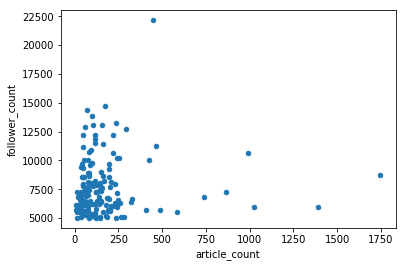

In [10]:
top_df.plot(kind="scatter", x="article_count", y="follower_count")

## The articles whose writer has 5000+ followers

### The relation between SNS share count and like count

- These two factors are strongly related
- Sharing numbers are much bigger than like counts

In [11]:
top_articles = get_article_df_by_writers(top_df["profile_id"].values)
top_articles_cleaned = top_articles.drop([
    "articleCoverColorForHome", "magazineArticleId", "coverColor", "contentId", "magazineNo", 
    "magazineType", "ip", "readSeconds", "pick", "userId", "sharedFacebookComment", "status"], 1)
parse_datetime(top_articles_cleaned, fields=["createTime", "publishTime", "updateTime"])

In [12]:
np.corrcoef(top_articles_cleaned["socialShareTotalCount"], top_articles_cleaned["likeCount"])[0, 1]

0.51849899507926045

In [13]:
top_articles_cleaned.sort_values("socialShareTotalCount", ascending=False).iloc[:5, 6:12]

,no,profileId,publishTime,socialShareTotalCount,subTitle,title
148,73,stillalive31,2015-08-11 14:35:54,61234,"반드시 피해야 할 지극히 나쁜 언행, 6천(賤)",#72 복을 내쫓고 화를 부르는 여섯 가지 천한 습관
34,389,jade,2016-08-24 10:59:21,55222,NaN,잠시 생각해 볼만한 그림들
294,35,sunsutu,2016-01-26 16:24:01,31780,전원주택 공사 시공 편,집 짓는 순서? 이것만 알아도 반은 성공.
669,202,brunchflgu,2015-10-08 17:49:01,25334,조우성 변호사의 비즈니스 인사이트,성과는 좋지만 성품이 나쁜 직원은 포기하겠다
47,27,suhanjang,2015-09-25 11:06:47,25087,NaN,"12. 인간의 시간, 회사의 시간"


In [14]:
top_articles_cleaned \
    .drop(["magazineAddress", "magazineTitle", "socialShareTotalCount"], 1) \
    .sort_values("likeCount", ascending=False).iloc[:5, 3:9]

,likeCount,no,profileId,publishTime,subTitle,title
34,734,389,jade,2016-08-24 10:59:21,NaN,잠시 생각해 볼만한 그림들
130,699,44,lunarshore,2016-03-14 05:45:39,차별화 전략을 잃어버린 브랜드가 망가지는 수순,브랜드가 망가지는 9단계
60,696,12,haneulalice,2015-11-12 00:55:51,저녁이 없는 삶은 누가 만든걸까요?,당신의 이직을 바랍니다
21,668,68,dohyunkim,2016-01-12 17:54:08,TED 해설강의 by NYU 유학생,6개월만에 영어를 마스터 하는 것이 가능할까?
96,658,264,jade,2016-03-28 12:05:35,NaN,바쁜 사람과 유능한 사람의 12가지 차이


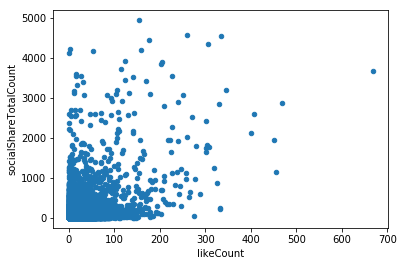

In [15]:
top_articles_cleaned[top_articles_cleaned["socialShareTotalCount"] < 5000] \
    .plot(kind="scatter", x="likeCount", y="socialShareTotalCount")

### How are top articles?

- The average of the number of images is 5.45, and the standard deviation is 8.46
- The mean of comment, like, SNS share is 3.61, 11.66, 60.12

In [16]:
top_articles_cleaned.drop(["no"], 1).describe()

,articleImageList,commentCount,likeCount,socialShareTotalCount
count,26891.000000,26891.000000,26891.000000,26891.000000
mean,5.451006,3.610093,11.655238,60.121676
std,8.457590,8.765005,25.753824,690.119018
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,0.000000
50%,3.000000,1.000000,5.000000,2.000000
75%,6.000000,4.000000,12.000000,14.000000
max,147.000000,310.000000,734.000000,61234.000000


### How they write?

- The total number of articles of writers with 5000+ followers is gradually increasing
- 98% of them started writing on Brunch before March 2016

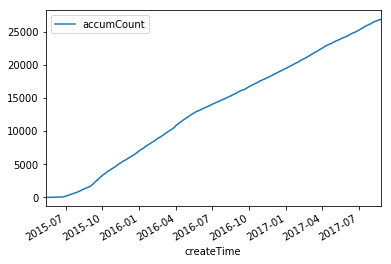

In [17]:
top_articles_cleaned = top_articles_cleaned.sort_values("createTime", ascending=True)
top_articles_cleaned["default"] = 1
top_articles_cleaned["accumCount"] = top_articles_cleaned["default"].cumsum()
top_articles_cleaned.plot(x="createTime", y="accumCount")

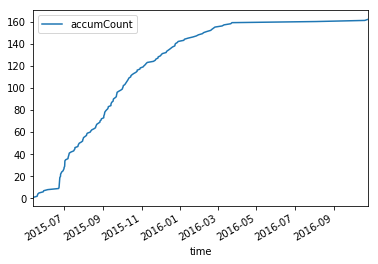

In [18]:
unique_top_writers = top_df["profile_id"].unique()
top_first_article_time = pd.DataFrame(
    [top_articles_cleaned[top_articles_cleaned["profileId"] == writer].iloc[0]["createTime"]
     for writer in unique_top_writers],
    columns=["time"]
)
top_first_article_time = top_first_article_time.sort_values("time")
top_first_article_time["default"] = 1
top_first_article_time["accumCount"] = top_first_article_time["default"].cumsum()
top_first_article_time.plot(x="time", y="accumCount")

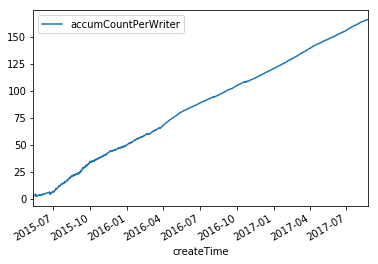

In [19]:
def find_writer_count_of_lastest_time(time:pd.datetime) -> int:
    result_values = top_first_article_time[top_first_article_time["time"] < time]["accumCount"].values
    if len(result_values) == 0:
        return 1
    return result_values[-1]
top_articles_cleaned["accumCountPerWriter"] = \
    top_articles_cleaned["accumCount"] / top_articles_cleaned["createTime"].apply(find_writer_count_of_lastest_time)
top_articles_cleaned.plot(x="createTime", y="accumCountPerWriter")

In [20]:
top_followers = get_follower_df_by_writers(top_df["profile_id"].values)
top_followers_cleaned = top_followers.drop(["articleCount", "userId", "myFollower", "myWriter", "subscribeNo"], 1)
parse_datetime(top_followers_cleaned, fields=["createTime"])
top_followers_cleaned.head()

,createTime,description,followerCount,profileId,userName,writerCount
0,2017-08-24 08:04:50,MAGARETT의 브런치입니다.,0,megan-yoon,MAGARETT,48
1,2017-08-24 07:29:31,구구의 브런치입니다.,0,jungulism,구구,8
2,2017-08-24 07:28:40,김보람의 브런치입니다.,0,kimboroam,김보람,2
3,2017-08-24 06:59:06,한수연의 브런치입니다.,1,nownhere23,한수연,50
4,2017-08-24 06:52:07,풍꼬의 브런치입니다.,0,ljk4936,풍꼬,159


### Tricky growth of Brunch

- What did happen in May 2016?
- The figure below includes duplicate followers of writers
- The number of fans on 30 April 2016 is 4.28 times more than the one on 31 March 2016
- This steep growth was affected by a marketing campaign, in which Kakao, the service provider, gave free promotional Kakaotalk emoticons

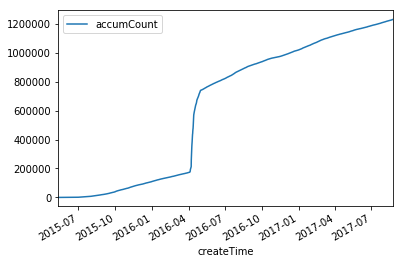

In [21]:
top_followers_cleaned = top_followers_cleaned.sort_values("createTime", ascending=True)
top_followers_cleaned["default"] = 1
top_followers_cleaned["accumCount"] = top_followers_cleaned["default"].cumsum()
top_followers_cleaned.plot(x="createTime", y="accumCount")

### For fun : The authors who the writers with 5000+ followers like most

In [22]:
top_followings = get_following_df_by_writers(top_df["profile_id"].values)
top_followings_cleaned = top_followings.drop(["articleCount", "userId", "myFollower", "myWriter", "subscribeNo"], 1)
parse_datetime(top_followings_cleaned, fields=["createTime"])
top_followings_cleaned["profileId"].value_counts()[1:13]

hyejinchoi      45
daljasee        44
kooning11       40
suhanjang       37
blade31         33
romanticgrey    32
2kija           32
dalda           31
onec            31
eastgo          31
sustainlife     30
jimmyrim        30
Name: profileId, dtype: int64

# Conclusion

- The number of writers with over 5000 followers is 162 
- The correlation between article count and follower count is low, which does not encourage authors to write more articles
- The user engagement of Brunch is focused on the share of SNS
- There was a strong marketing campaign on April 2016

## Limitation of this study

- It is not examined if the Kakaotalk marketing campaign helped the growth of Brunch
- To figure it out, the active user data should be backed up 